# Dog & Cats Dataset

*  This come from Dog & Cats competition, It must requested to write an algorithm to classify whether images contain either a dog or a cat. 

### Import Libraries

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

### Convolutional Libraries

In [2]:
# TensorFlow Library
import tensorflow as tf
# # Model Layers
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dropout, Flatten, Dense, BatchNormalization
# Model Image Generators
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# Model Callbacks
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
# Model Optimizer & Regulalizers
from tensorflow.keras import models, optimizers, regularizers

In [3]:
# Invoke Model Type
model = models.Sequential()

# 1st Convolution
model.add(Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)))
# Complexity Reduction
model.add(MaxPool2D((2,2)))
# Batch Normalization
model.add(BatchNormalization())

# 2nd Convolution
model.add(Conv2D(64, (3,3), activation='relu'))
#model.add(Conv2D(64, (3,3), activation='relu'))
# Complexity Reduction
model.add(MaxPool2D((2,2), padding='same'))
# Batch Normalization
model.add(BatchNormalization())

# 3rd Convolution
model.add(Conv2D(128, (3,3), activation='relu'))
#model.add(Conv2D(128, (3,3), activation='relu'))
# Complexity Reduction
model.add(MaxPool2D((2,2)))
# Batch Normalization
model.add(BatchNormalization())

# 4th Convolution
model.add(Conv2D(256, (3,3), activation='relu'))
#model.add(Conv2D(256, (3,3), activation='relu'))
# Complexity Reduction
model.add(MaxPool2D((2,2)))
# Batch Normalization
model.add(BatchNormalization())

# 5th Convolution
model.add(Conv2D(512, (3,3), activation='relu', padding='same'))
#model.add(Conv2D(512, (3,3), activation='relu', padding='same'))
# Complexity Reduction
model.add(MaxPool2D((2,2), padding='same'))
# Batch Normalization
model.add(BatchNormalization())

# 6th Convolution
model.add(Conv2D(512, (3,3), activation='relu',  padding='same'))
#model.add(Conv2D(512, (3,3), activation='relu',  padding='same'))
# Complexity Reduction
model.add(MaxPool2D((2,2), padding='same'))
# Batch Normalization
model.add(BatchNormalization())

# Flatten Classifier

# One Dimension Flatten Layer
model.add(Flatten())
# Dense Layer
model.add(Dense(512, activation='relu'))
# Dropout layer at 30%
model.add(Dropout(0.3))
# 2nd Dense Layer
model.add(Dense(1, activation='sigmoid'))

# Summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 74, 74, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                        

In [4]:
train_datagen = ImageDataGenerator(
                             rescale=1./255,
                             rotation_range=40,
                             width_shift_range=0.2,
                             height_shift_range=0.2,
                             shear_range=0.2,
                             zoom_range=0.2,
                             horizontal_flip=True,
                             brightness_range=(1.0, 2.0),
                             fill_mode='nearest'
                            )

In [5]:
test_datagen = ImageDataGenerator(rescale=1./255) 

In [6]:
train_generator = train_datagen.flow_from_directory('/kaggle/input/cnn-data-sources/cats_and_dogs/train',
                                 target_size=(150,150),
                                 batch_size=64,
                                 class_mode='binary')

validation_generator = test_datagen.flow_from_directory('/kaggle/input/cnn-data-sources/cats_and_dogs/validation',
                                 target_size=(150,150),
                                 batch_size=64,
                                 class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [7]:
checkpoint = ModelCheckpoint('cats_dogs_model.hdf5', 
                             monitor='val_accuracy', 
                             verbose=1, 
                             save_best_only=True)

In [8]:
model.compile(loss='binary_crossentropy', 
              optimizer=optimizers.Adam(), 
              metrics=['accuracy'])

In [9]:
hist = model.fit(train_generator, 
                 steps_per_epoch=2000//64, 
                 epochs=120, 
                 validation_data=validation_generator,
                 validation_steps=1000//64, 
                 callbacks=[checkpoint]
                )

Epoch 1/120
31/31 [==============================] - ETA: 0s - loss: 1.2729 - accuracy: 0.5403
Epoch 1: val_accuracy improved from -inf to 0.49583, saving model to cats_dogs_model.hdf5
31/31 [==============================] - 51s 1s/step - loss: 1.2729 - accuracy: 0.5403 - val_loss: 1.1171 - val_accuracy: 0.4958
Epoch 2/120
31/31 [==============================] - ETA: 0s - loss: 1.0308 - accuracy: 0.5532
Epoch 2: val_accuracy did not improve from 0.49583
31/31 [==============================] - 21s 687ms/step - loss: 1.0308 - accuracy: 0.5532 - val_loss: 1.0275 - val_accuracy: 0.4938
Epoch 3/120
31/31 [==============================] - ETA: 0s - loss: 0.8005 - accuracy: 0.5983
Epoch 3: val_accuracy improved from 0.49583 to 0.51042, saving model to cats_dogs_model.hdf5
31/31 [==============================] - 22s 710ms/step - loss: 0.8005 - accuracy: 0.5983 - val_loss: 0.6871 - val_accuracy: 0.5104
Epoch 4/120
31/31 [==============================] - ETA: 0s - loss: 0.6815 - accuracy: 

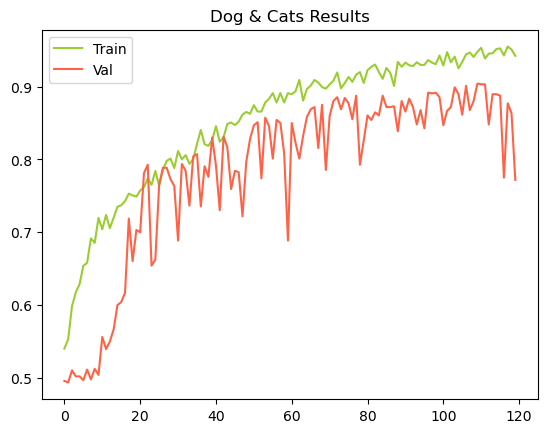

In [10]:
# Training Accuracy
plt.plot(hist.history['accuracy'],label='Train', color='yellowgreen')
# Validation Accuracy
plt.plot(hist.history['val_accuracy'],label='Val', color='tomato')
# Title
plt.title('Dog & Cats Results')
# Visualization Legend
plt.legend()
plt.show()

In [11]:
test_generator = test_datagen.flow_from_directory('/kaggle/input/cnn-data-sources/cats_and_dogs/test',
                                 target_size=(150,150),
                                 batch_size=64,
                                 class_mode='binary')

Found 1000 images belonging to 2 classes.


In [12]:
model2 = model

In [13]:
model2.load_weights('/kaggle/working/cats_dogs_model.hdf5')

In [14]:
model2.evaluate(test_generator)

16/16 [==============================] - 9s 596ms/step - loss: 0.2875 - accuracy: 0.9040


[0.28750845789909363, 0.9039999842643738]

### Model Evaluation

#### After perform this model. A 87% model accuracy has been achieved. Although seem to has desparities, the model stated approximately from 50 % & climbed to almost 90% of accuracy. 